**Tugas Dbimbing**

Nama : Mohammad Ilham

Github : [Mohammad ilham](https://github.com/ilhamsaang)

LinkedIn : [Mohammad Ilham](https://www.linkedin.com/feed/)

Google Drive : [Dokumentasi & Berkas](https://drive.google.com/drive/folders/1LQgxu8HvSqWXSZC7FzsienwcnvaW4xUP?usp=sharing)


**Tujuan** : Mencari Persebaran Lowongan kerja sebagai Data Analyst berdasarkan lokasi perusahaan berdasarkan Website [Jobstreet](https://id.jobstreet.com/)

**<Span style="Color: Yellow">Step 1 : Installasi Library</Span>**

In [ ]:
%pip install selenium beautifulsoup4 pandas webdriver-manager

> <span style="Color:red;">__!pip install selenium beautifulsoup4 pandas webdriver-manager__</span>

Kode ini bertujuan untuk melakukan installasi library yang diperlukan seperti:

__Selenium :__
Library ini bertujuan untuk melakukan automasi interaksi pada elemen web dalam melakukan web scraping, sebab pada website jobstreet terdapat banyak jobcard dan pagingnation untuk melihat lebih banyak lagi jobcard yang ada.

__Beautifulsoup4 :__
Library Python ini digunakan untuk mengekstrak data dari file HTML dan XML, penggunaan library ini digunakan untuk mencari Tag HTML (misalnya div, a, p), atribut (misalnya class, id, href), atau teks di lain dalamnya untuk melakukan interaksi elemen web menggunakan selenium.

__pandas :__
Library Python  untuk analisis dan manipulasi data. Library ini digunakan untuk melakukan export/import data dari berbagai format seperti CSV, Excel, SQL database, JSON, HTML, dan lainnya. selain itu, digunakan juga untuk melakukan data cleansing atau pembersihan data yang terduplikasi ataupun missing value, serta melakukan analisis data untuk mengetahui keterkaitan antar data dalam memprediksi apa yang diinginkan.

__Webdriver-manager :__
Library Python yang dirancang untuk menyederhanakan pengelolaan WebDriver (file executable yang diperlukan Selenium untuk berinterinteraksi dengan browser).

**<Span style="Color: Yellow">Step 2: lakukan pembaruan pada paket software yang digunakan</Span>**

In [ ]:
!apt-get update
!apt-get install chromium-browser

> <span style="Color:red;">__!apt-get update__</span>

merupakan perintah yang memiliki fungsi utama untuk memperbarui daftar paket yang tersedia dari repositori.

> <span style="Color:red;">__!apt-get install chromium-browser__</span>

Setelah daftar paket diperbarui, perintah !apt-get install chromium-browser (atau sudo apt-get install chromium-browser di terminal) berfungsi untuk menginstal paket software chromium-browser dan semua dependensinya ke sistem.

**<Span style="Color: Yellow">Step 3: Data Scraping</Span>**

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import re

In [ ]:

# ================== Fungsi Generate Filename ===================
def generate_unique_filename(base_name, ext=".csv"):
    i = 1
    filename = f"{base_name}{ext}"
    while os.path.exists(filename):
        filename = f"{base_name}({i}){ext}"
        i += 1
    return filename

# ================== Fungsi Konversi Tanggal ke Hari ===================
def convert_posted_date_to_days(posted_text):
    posted_text = posted_text.lower()
    
    number = re.search(r'(\d+)', posted_text)
    if not number:
        return -1  # Tidak ada angka ditemukan
    
    value = int(number.group(1))
    
    if "hari" in posted_text:
        return value
    elif "bulan" in posted_text:
        return value * 30
    elif "jam" in posted_text:
        return 0
    else:
        return -1

# ================== Setup Selenium ===================
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
options.add_argument("--window-size=1920,1080")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

driver = webdriver.Chrome(options=options)

# ================== Input Keyword ===================
def input_keyword():
    keyword = input("Masukkan angka-angka yang ingin dijumlahkan (pisahkan dengan spasi): ")
    return keyword
keyword = input_keyword()

# ================== Scraping ===================
base_url = f"https://www.jobstreet.co.id/id/data-analyst-jobs"
jobs = []
max_pages = 2 #banyaknya halaman yang akan dilakukan web scraping

for page in range(1, max_pages + 1):
    if page == 1:
        url = base_url
    else:
        url = f"{base_url}?page={page}"

    print(f"\n🔎 Mengakses halaman {page} : {url}")
    driver.get(url)
    time.sleep(4) #lama waktu tunggu, apabila internet lambat disarankan menambahkan waktu tunggunya

    soup = BeautifulSoup(driver.page_source, "html.parser")
    job_cards = soup.find_all('article', attrs={'data-automation': 'normalJob'})
    print(f"📦 Ditemukan {len(job_cards)} lowongan di halaman ini.")

    if not job_cards:
        print("⚠️ Tidak ada lowongan ditemukan, hentikan scraping.")
        break

    for job in job_cards:
        try:
            JobP_tag = job.find('a', {'data-automation': 'jobTitle'})
            JobPosition = JobP_tag.text.strip() if JobP_tag else "N/A"

            company_tag = job.find('a', {'data-automation': 'jobCompany'})
            company = company_tag.text.strip() if company_tag else "N/A"

            location_tags = job.find_all('a', {'data-automation': 'jobLocation'})
            location = ", ".join([l.text.strip() for l in location_tags]) if location_tags else "N/A"

            link_tag = job.find('a', {'data-automation': 'job-list-item-link-overlay'})
            link = "https://www.jobstreet.co.id" + link_tag['href'] if link_tag else "#"

            # Ambil tanggal posting menggunakan data-automation
            date_tag = job.find('span', {'data-automation': 'jobListingDate'})
            date_text = date_tag.text.strip() if date_tag else "N/A"
            days_since_posted = convert_posted_date_to_days(date_text)

            # Kunjungi halaman detail untuk ambil salary, job type, deskripsi
            driver.get(link)
            time.sleep(3)
            detail_soup = BeautifulSoup(driver.page_source, "html.parser")

            salary_tag = detail_soup.find("span", {"data-automation": "job-detail-salary"})
            salary = salary_tag.text.strip() if salary_tag else "N/A"

            job_type_tag = detail_soup.find("span", {"data-automation": "job-detail-work-type"})
            job_type = job_type_tag.text.strip() if job_type_tag else "N/A"

            desc_tag = detail_soup.find("div", {"data-automation": "jobAdDetails"})
            description = desc_tag.get_text(separator="\n").strip() if desc_tag else "N/A"

            jobs.append({
                "Job Position": JobPosition,
                "Company": company,
                "Location": location,
                "Salary": salary,
                "Job Type": job_type,
                "Days_Since_Posted": days_since_posted,
                "Link": link,
                "Description": description
            })

            print(f"[{len(jobs)}] ✅ {JobPosition} | {company} | {job_type} | {days_since_posted} hari")
            driver.back()
            time.sleep(2)
        except Exception as e:
            print(f"[{len(jobs)}] ❌ Error: {e}")
            driver.back()
            time.sleep(2)
            continue

driver.quit()

# ================== Simpan ke CSV ===================
filename = generate_unique_filename("lowongan_jobstreet_lengkap")
df = pd.DataFrame(jobs)
df.to_csv(filename, index=False, encoding='utf-8-sig')
print(f"\n✅ Selesai! Total {len(jobs)} data disimpan di {filename}")



<pre lang="markdown">
def generate_unique_filename(base_name, ext=".csv"):
    i = 1
    filename = f"{base_name}{ext}"
    while os.path.exists(filename):
        filename = f"{base_name}({i}){ext}"
        i += 1
    return filename
</pre>

<pre lang="markdown">
def convert_posted_date_to_days(posted_text):
    posted_text = posted_text.lower()
    
    number = re.search(r'(\d+)', posted_text)
    if not number:
        return -1  # Tidak ada angka ditemukan
    
    value = int(number.group(1))
    
    if "hari" in posted_text:
        return value
    elif "bulan" in posted_text:
        return value * 30
    elif "jam" in posted_text:
        return 0
    else:
        return -1
</pre>

<pre lang="markdown">
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
options.add_argument("--window-size=1920,1080")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
driver = webdriver.Chrome(options=options)
</pre>

<pre lang="markdown">
def input_keyword():
    keyword = input("Masukkan angka-angka yang ingin dijumlahkan (pisahkan dengan spasi): ")
    return keyword
keyword = input_keyword()
</pre>


<pre lang="markdown">
max_pages = 2
for page in range(1, max_pages + 1):
    ...
</pre>


<pre lang="markdown">
driver.back()
time.sleep(2)
</pre>


<pre lang="markdown">
except Exception as e:
    print(f"[{len(jobs)}] ❌ Error: {e}")
    driver.back()
    time.sleep(2)
    continue
</pre>


<pre lang="markdown">
driver.quit()
</pre>

<pre lang="markdown">
filename = generate_unique_filename("lowongan_jobstreet_lengkap")
df = pd.DataFrame(jobs)
df.to_csv(filename, index=False, encoding='utf-8-sig')
print(f"\n✅ Selesai! Total {len(jobs)} data disimpan di {filename}")
</pre>

**<Span style="Color: Yellow">Step 4: Data Description</Span>**

In [146]:
files = [f for f in os.listdir('.') if f.startswith('lowongan_jobstreet_lengkap') and f.endswith('.csv')]

# Cari file dengan nomor terbesar
def extract_number(f):
    match = re.search(r'\((\d+)\)', f)
    return int(match.group(1)) if match else 0

# Ambil file terbesar dengan max
latest_file = max(files, key=extract_number)

print(f"File yang dibaca: {latest_file}")

df = pd.read_csv(latest_file, engine='python')

File yang dibaca: lowongan_jobstreet_lengkap.csv


In [147]:
# Jumlah data (baris dan kolom)
print("Jumlah data (baris, kolom):", df.shape)

Jumlah data (baris, kolom): (64, 8)


In [148]:
print("\nInformasi tipe data dan skema pengkodean:")
print(df.info())


Informasi tipe data dan skema pengkodean:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Position       64 non-null     object
 1   Company            62 non-null     object
 2   Location           64 non-null     object
 3   Salary             15 non-null     object
 4   Job Type           64 non-null     object
 5   Days_Since_Posted  64 non-null     int64 
 6   Link               64 non-null     object
 7   Description        64 non-null     object
dtypes: int64(1), object(7)
memory usage: 4.1+ KB
None


In [149]:
print("\nStatistik deskriptif untuk data numerik:")
print(df.describe())


Statistik deskriptif untuk data numerik:
       Days_Since_Posted
count          64.000000
mean            8.359375
std             6.999699
min             1.000000
25%             3.000000
50%             5.000000
75%            12.750000
max            25.000000


In [150]:
# Melihat beberapa baris pertama data
print("\nBeberapa baris pertama data:")
print(df.head(5))


Beberapa baris pertama data:
                                        Job Position  \
0  D3 for Data Analyst - Production Staff (CODE :...   
1                                 ADMIN DATA ANALYST   
2                            Contract & Data Analyst   
3                                       Data Analyst   
4                                       Data Analyst   

                                             Company  \
0        PT Panasonic Gobel Energy Indonesia (PECGI)   
1                             PT Atria Artha Persada   
2  PT Mineral Alam Abadi (Mineral Alam Abadi Group).   
3                             PT. MAX AUTO INDONESIA   
4                    PT Kalowave Teknologi Indonesia   

                      Location                                 Salary  \
0         Cibitung, Jawa Barat                                    NaN   
1        Medan, Sumatera Utara  Rp 3.500.000 – Rp 4.000.000 per month   
2  Jakarta Barat, Jakarta Raya                                    NaN   
3   

**<Span style="Color: Yellow">Step 5: Data Cleansing</Span>**


Jumlah Nilai Hilang Setiap Kolom (kecuali nilai string seperti 'Not Disclosed'):
Job Position         0
Company              0
Location             0
Salary               0
Job Type             0
Days_Since_Posted    0
Link                 0
Description          0
Provinsi             0
Provinsi_Singkat     0
dtype: int64


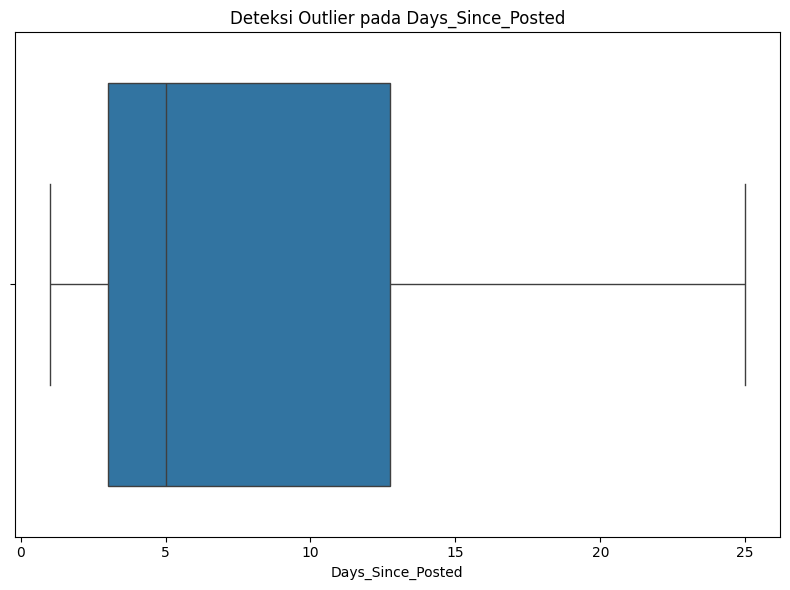

In [ ]:
df['Salary'] = df['Salary'].fillna('Not Disclosed')

# Pilih hanya kolom numerik untuk analisis outlier
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Cek nilai hilang yang sesungguhnya (bukan string 'Not Disclosed')
missing_values = df.isnull().sum()

print("\nJumlah Nilai Hilang Setiap Kolom (kecuali nilai string seperti 'Not Disclosed'):")
print(missing_values)

# Visualisasi boxplot jika ada fitur numerik
if len(numerical_features) == 0:
    print("\nTidak ada kolom numerik untuk dianalisis outlier.")
else:
    for feature in numerical_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[feature])
        plt.title(f"Deteksi Outlier pada {feature}")
        plt.tight_layout()
        plt.show()

In [182]:
# Hitung jumlah nilai hilang sebelum pembersihan
missing_before = df.isna().sum()

# Cleaning:
# 1. Isi nilai hilang pada 'Company' dengan 'Unknown Company'
df['Company'] = df['Company'].fillna('Unknown Company')

# 2. Isi nilai hilang pada 'Salary' dengan 'Not Disclosed'
df['Salary'] = df['Salary'].fillna('Not Disclosed')

# Cek jumlah nilai hilang setiap kolom setelah cleaning
missing_after = df.isna().sum()
print("\nJumlah Nilai Hilang Setiap Kolom sebelum Cleansing:")
print(missing_before)

print("\nJumlah Nilai Hilang Setiap Kolom sesudah Cleansing:")
print(missing_after)



Jumlah Nilai Hilang Setiap Kolom sebelum Cleansing:
Job Position         0
Company              0
Location             0
Salary               0
Job Type             0
Days_Since_Posted    0
Link                 0
Description          0
Provinsi             0
Provinsi_Singkat     0
dtype: int64

Jumlah Nilai Hilang Setiap Kolom sesudah Cleansing:
Job Position         0
Company              0
Location             0
Salary               0
Job Type             0
Days_Since_Posted    0
Link                 0
Description          0
Provinsi             0
Provinsi_Singkat     0
dtype: int64


In [154]:
# Fungsi cari file dengan nomor terbesar
def find_highest_numbered_filename(base_name, ext=".csv"):
    pattern = re.compile(rf"{base_name}\((\d+)\){ext}")
    max_number = 0

    for filename in os.listdir():
        match = pattern.match(filename)
        if match:
            number = int(match.group(1))
            if number > max_number:
                max_number = number

    # Jika tidak ada file bernomor, gunakan base_name.csv
    if max_number == 0 and os.path.exists(f"{base_name}{ext}"):
        return f"{base_name}{ext}"
    elif max_number == 0:
        return f"{base_name}{ext}"
    else:
        return f"{base_name}({max_number}){ext}"

# ================== Load Data ===================
target_file = find_highest_numbered_filename("lowongan_jobstreet_lengkap")
print(f"🔎 Membaca file: {target_file}")

df = pd.read_csv(target_file, engine='python')

# ================== Cek dan Hapus Duplikat ===================
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    df = df.drop_duplicates()
    df.to_csv(target_file, index=False, encoding='utf-8-sig')
    print(f"✅ {duplicate_rows} baris duplikat dihapus dan file disimpan kembali ke '{target_file}'")
else:
    print("\n✅ Tidak ada baris data duplikat.")

🔎 Membaca file: lowongan_jobstreet_lengkap.csv

✅ Tidak ada baris data duplikat.


In [155]:
# Menampilkan jumlah nilai unik untuk setiap kolom (untuk memahami kategori)
print("\nJumlah nilai unik untuk setiap kolom:")
for column in df.columns:
  print(f"{column}: {df[column].nunique()}")


Jumlah nilai unik untuk setiap kolom:
Job Position: 52
Company: 55
Location: 22
Salary: 12
Job Type: 3
Days_Since_Posted: 18
Link: 64
Description: 60


**<Span style="Color: Yellow">Step 6: Data Eksploration</Span>**

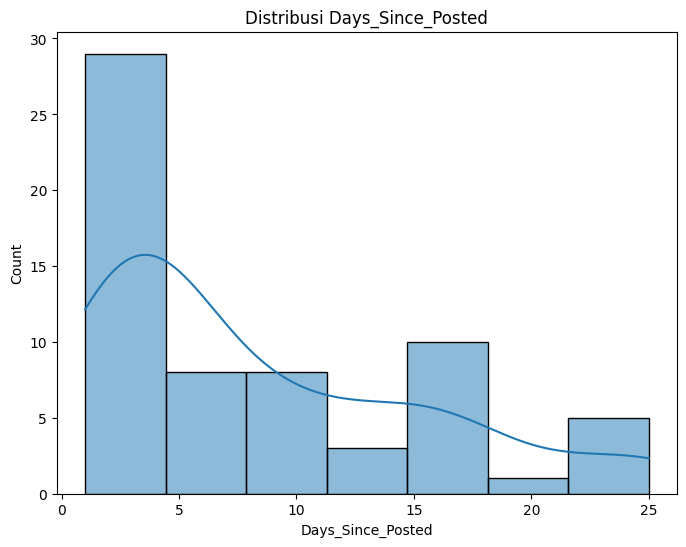

In [156]:
# Analisis Distribusi Data Numerik
numerical_features = df.select_dtypes(include=['number']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
sns.histplot(df[feature], kde=True)
plt.title(f"Distribusi {feature}")
plt.show()

In [157]:
# Hitung jumlah lowongan berdasarkan perusahaan
perusahaan_counts = df['Company'].value_counts()

# Hitung jumlah lowongan berdasarkan lokasi
lokasi_counts = df['Location'].value_counts()

# Hitung jumlah lowongan berdasarkan perusahaan
salary_counts = df['Salary'].value_counts()

# Hitung jumlah lowongan berdasarkan perusahaan
JobType_counts = df['Job Type'].value_counts()
# Hitung jumlah lowongan berdasarkan waktu pencarian
date_counts = df['Days_Since_Posted'].value_counts()

# merubah lokasi kota menjadi provinsi
df['Provinsi'] = df['Location'].apply(lambda x: x.split(',')[-1].strip() if pd.notnull(x) else x)

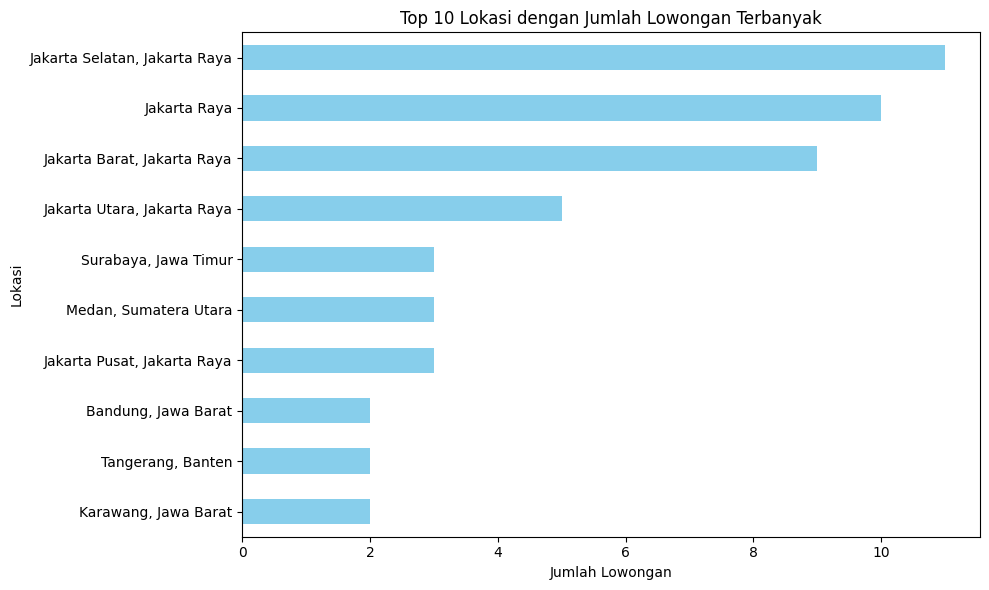

In [158]:
plt.figure(figsize=(10, 6))
lokasi_counts = df['Location'].value_counts()
lokasi_counts.head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Lokasi dengan Jumlah Lowongan Terbanyak")
plt.xlabel("Jumlah Lowongan")
plt.ylabel("Lokasi")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

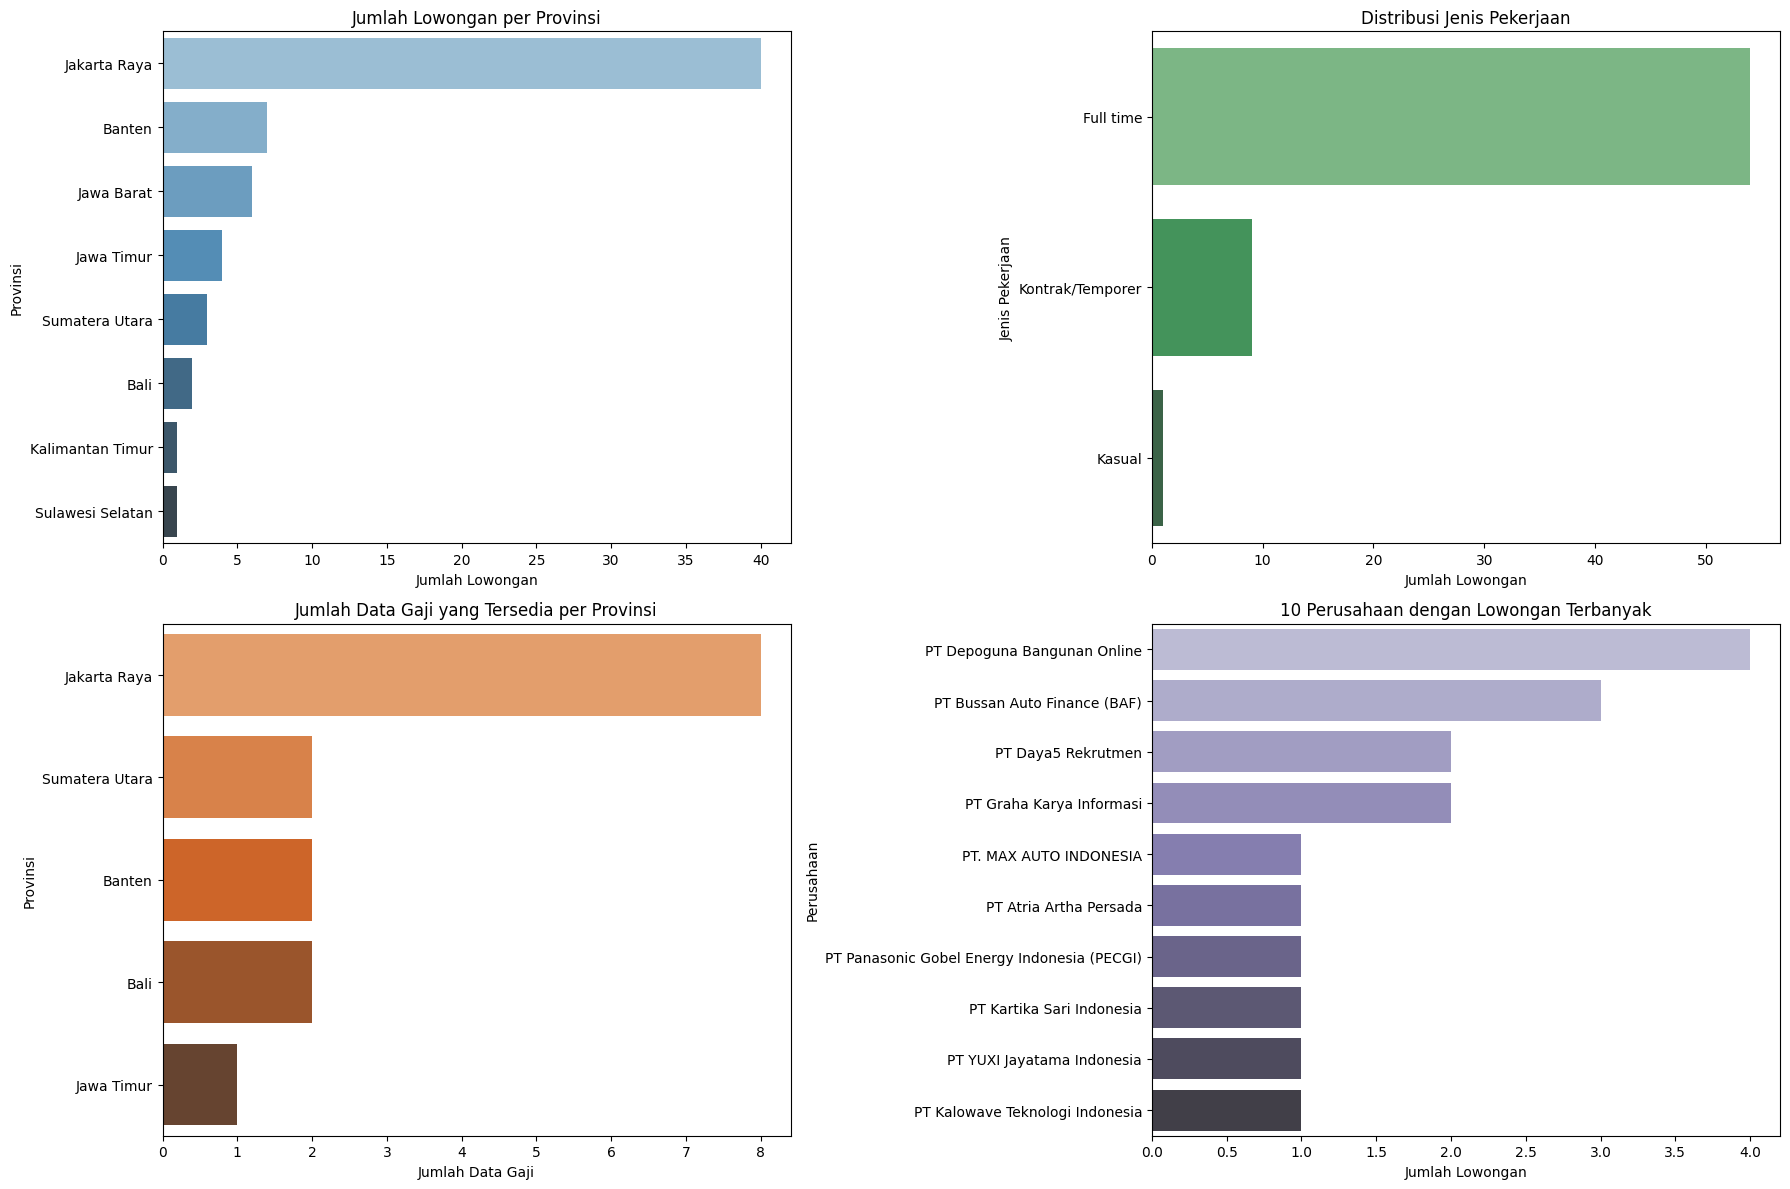

In [159]:
# Jumlah lowongan per provinsi
lowongan_per_provinsi = df['Provinsi'].value_counts()

# Distribusi jenis pekerjaan
job_type_counts = df['Job Type'].value_counts()

# Jumlah entri gaji yang tersedia per provinsi (hanya data yang memiliki nilai gaji)
salary_data = df[['Provinsi', 'Salary']].dropna()
salary_count_per_provinsi = salary_data['Provinsi'].value_counts()

# Perusahaan dengan jumlah lowongan terbanyak (top 10)
company_counts = df['Company'].value_counts().dropna().head(10)
provinsi_df = lowongan_per_provinsi.reset_index()
provinsi_df.columns = ['Provinsi', 'Jumlah']

# Plotting ulang dengan pendekatan DataFrame
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Lowongan per Provinsi
sns.barplot(x=lowongan_per_provinsi.values, y=lowongan_per_provinsi.index,
            hue=lowongan_per_provinsi.index, palette='Blues_d', legend=False, ax=axes[0, 0])
axes[0, 0].set_title('Jumlah Lowongan per Provinsi')
axes[0, 0].set_xlabel('Jumlah Lowongan')
axes[0, 0].set_ylabel('Provinsi')

# 2. Job Type Distribution
sns.barplot(x=job_type_counts.values, y=job_type_counts.index,
            hue=job_type_counts.index, palette='Greens_d', legend=False, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Jenis Pekerjaan')
axes[0, 1].set_xlabel('Jumlah Lowongan')
axes[0, 1].set_ylabel('Jenis Pekerjaan')

# 4. Gaji per Provinsi
sns.barplot(x=salary_count_per_provinsi.values, y=salary_count_per_provinsi.index,
            hue=salary_count_per_provinsi.index, palette='Oranges_d', legend=False, ax=axes[1, 0])
axes[1, 0].set_title('Jumlah Data Gaji yang Tersedia per Provinsi')
axes[1, 0].set_xlabel('Jumlah Data Gaji')
axes[1, 0].set_ylabel('Provinsi')

# 5. Perusahaan Paling Aktif
sns.barplot(x=company_counts.values, y=company_counts.index,
            hue=company_counts.index, palette='Purples_d', legend=False, ax=axes[1, 1])
axes[1, 1].set_title('10 Perusahaan dengan Lowongan Terbanyak')
axes[1, 1].set_xlabel('Jumlah Lowongan')
axes[1, 1].set_ylabel('Perusahaan')


plt.tight_layout()
plt.show()

**<Span style="Color: Yellow">Step 7: Data Validation</Span>**

In [175]:
# 1. Validasi Kolom 'Days_Since_Posted'
print("\nValidasi Days_Since_Posted:")
if df['Days_Since_Posted'].min() < 0:
    print("Terdapat nilai negatif pada 'Days_Since_Posted', perlu diperiksa.")
else:
    print("Semua nilai pada 'Days_Since_Posted' valid (>= 0).")

# 2. Validasi Kolom 'Job Type'
print("\nValidasi Job Type:")
valid_job_types = ['Full time', 'Kontrak/Temporer','Kontrak', 'Temporer', 'Paruh waktu', 'Tetap','Kasual']
invalid_job_types = df['Job Type'].dropna().apply(lambda x: x not in valid_job_types).sum()
if invalid_job_types > 0:
    print(f"Terdapat {invalid_job_types} nilai 'Job Type' yang tidak valid.")
else:
    print("Semua nilai pada 'Job Type' valid.")

# 3. Deteksi dan Tangani Duplikat
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f"\nTerdapat {duplicate_rows} baris data duplikat.")
else:
    print("\nTidak ada baris data duplikat.")

# 4. Validasi Gaji (Salary)
def is_valid_salary(s):
    try:
        s = str(s).lower().replace('.', '').replace('rp', '').strip()
        return bool(re.search(r'\d+', s))  # mengandung angka
    except:
        return False

# Buat mask boolean
valid_salary_mask = df['Salary'].apply(is_valid_salary)

# Hitung jumlah
valid_salary_count = valid_salary_mask.sum()
invalid_salary_count = (~valid_salary_mask).sum()

# Tampilkan hasil
print(f"Terdapat {valid_salary_count} data dengan informasi gaji yang valid (numerik).")
print(f"Terdapat {invalid_salary_count} data yang tidak mencantumkan informasi gaji (numerik).\n")

# Tampilkan contoh isi Salary yang valid dan tidak valid
print("Contoh Salary yang valid (numerik):")
print(df['Salary'][valid_salary_mask].head(5))  # tampilkan 5 contoh

print("\nContoh Salary yang tidak valid (bukan numerik):")
print(df['Salary'][~valid_salary_mask].head(5))  # tampilkan 5 contoh
# 5. Validasi Kolom 'Provinsi'
print("\nValidasi Provinsi:")
missing_provinsi = df['Provinsi'].isna().sum()
if missing_provinsi > 0:
    print(f"Terdapat {missing_provinsi} entri yang tidak memiliki nama provinsi.")
else:
    print("Semua data memiliki nama provinsi.")

# 6. Validasi Kolom 'Posted_Text'
print("\nValidasi Posted_Text:")
missing_posted_text = df['Days_Since_Posted'].isna().sum()
if missing_posted_text > 0:
    print(f"Terdapat {missing_posted_text} data yang tidak memiliki informasi waktu posting.")
else:
    print("Semua data memiliki informasi waktu posting.")


Validasi Days_Since_Posted:
Semua nilai pada 'Days_Since_Posted' valid (>= 0).

Validasi Job Type:
Semua nilai pada 'Job Type' valid.

Tidak ada baris data duplikat.
Terdapat 15 data dengan informasi gaji yang valid (numerik).
Terdapat 49 data yang tidak mencantumkan informasi gaji (numerik).

Contoh Salary yang valid (numerik):
1       Rp 3.500.000 – Rp 4.000.000 per month
4       Rp 5.650.000 – Rp 7.500.000 per month
5     Rp 10.000.000 – Rp 14.000.000 per month
7       Rp 4.500.000 – Rp 5.500.000 per month
15      Rp 6.000.000 – Rp 8.000.000 per month
Name: Salary, dtype: object

Contoh Salary yang tidak valid (bukan numerik):
0    Not Disclosed
2    Not Disclosed
3    Not Disclosed
6    Not Disclosed
8    Not Disclosed
Name: Salary, dtype: object

Validasi Provinsi:
Semua data memiliki nama provinsi.

Validasi Posted_Text:
Semua data memiliki informasi waktu posting.


In [164]:

data = {
    'Salary': ['Rp 3.000.000 - Rp 5.000.000', 'Rp 7.000.000 - Rp 10.000.000', None, 'Rp 4.000.000 - Rp 6.000.000']
}
df_salary = pd.DataFrame(data)

# 1. Isi missing value di kolom Salary dengan 'Not Disclosed'
df_salary['Salary'] = df_salary['Salary'].fillna('Not Disclosed')

# 2. Tambahkan kolom label Salary_Disclosed
# Jika Salary = 'Not Disclosed' maka label 0, selain itu 1
df_salary['Salary_Disclosed'] = df_salary['Salary'].apply(lambda x: 0 if x == 'Not Disclosed' else 1)

print(df_salary)

                         Salary  Salary_Disclosed
0   Rp 3.000.000 - Rp 5.000.000                 1
1  Rp 7.000.000 - Rp 10.000.000                 1
2                 Not Disclosed                 0
3   Rp 4.000.000 - Rp 6.000.000                 1


**<Span style="Color: Yellow">Step 8: Data Annotation</Span>**

In [177]:
# ================== Data Annotation untuk Job Type ===================



df_jobtype = pd.DataFrame({
    'Job Type': ['Full time', 'Part time', 'Contract', 'Internship', 'Kasual', 'Freelance']
})

# Mapping label sesuai SOP
job_type_mapping = {
    'Full time': 'FT',
    'Part time': 'PT',
    'Contract': 'CT',
    'Internship': 'IN',
    'Kasual': 'KL'
}

# Buat kolom baru 'Job_Type_Label' dengan mapping di atas
# Jika job type tidak ada di mapping, labelnya menjadi 'Other'
df_jobtype['Job_Type_Label'] = df_jobtype['Job Type'].map(job_type_mapping).fillna('Other')

# Tampilkan data dengan label baru
print("\nData dengan Job_Type_Label berdasarkan SOP:")
print(df_jobtype[['Job Type', 'Job_Type_Label']].head(6))


Data dengan Job_Type_Label berdasarkan SOP:
     Job Type Job_Type_Label
0   Full time             FT
1   Part time             PT
2    Contract             CT
3  Internship             IN
4      Kasual             KL
5   Freelance          Other


In [176]:
province_mapping = {
    'Aceh': 'AC',
    'Sumatera Utara': 'SU',
    'Sumatera Barat': 'SB',
    'Riau': 'RI',
    'Kepulauan Riau': 'KR',
    'Jambi': 'JA',
    'Sumatera Selatan': 'SS',
    'Bangka Belitung': 'BB',
    'Bengkulu': 'BE',
    'Lampung': 'LA',
    'Banten': 'BT',
    'Jakarta Raya': 'JK',
    'Jawa Barat': 'JB',
    'Jawa Tengah': 'JT',
    'DI Yogyakarta': 'YO',
    'Jawa Timur': 'JI',
    'Bali': 'BA',
    'Nusa Tenggara Barat': 'NB',
    'Nusa Tenggara Timur': 'NT',
    'Kalimantan Barat': 'KB',
    'Kalimantan Tengah': 'KT',
    'Kalimantan Selatan': 'KS',
    'Kalimantan Timur': 'KI',
    'Kalimantan Utara': 'KU',
    'Sulawesi Utara': 'SA',
    'Gorontalo': 'GO',
    'Sulawesi Tengah': 'ST',
    'Sulawesi Barat': 'SR',
    'Sulawesi Selatan': 'SN',
    'Sulawesi Tenggara': 'SG',
    'Maluku': 'MA',
    'Maluku Utara': 'MU',
    'Papua': 'PA',
    'Papua Barat': 'PB',
    'Papua Tengah': 'PT',
    'Papua Pegunungan': 'PP',
    'Papua Selatan': 'PS',
    'Papua Barat Daya': 'PD'
}

df['Provinsi_Singkat'] = df['Provinsi'].map(province_mapping).fillna('Unknown')

print(df[['Provinsi', 'Provinsi_Singkat']].head(38))


          Provinsi Provinsi_Singkat
0       Jawa Barat               JB
1   Sumatera Utara               SU
2     Jakarta Raya               JK
3       Jawa Timur               JI
4     Jakarta Raya               JK
5     Jakarta Raya               JK
6       Jawa Barat               JB
7           Banten               BT
8     Jakarta Raya               JK
9     Jakarta Raya               JK
10      Jawa Barat               JB
11    Jakarta Raya               JK
12    Jakarta Raya               JK
13      Jawa Barat               JB
14          Banten               BT
15    Jakarta Raya               JK
16    Jakarta Raya               JK
17          Banten               BT
18  Sumatera Utara               SU
19    Jakarta Raya               JK
20    Jakarta Raya               JK
21          Banten               BT
22    Jakarta Raya               JK
23    Jakarta Raya               JK
24    Jakarta Raya               JK
25    Jakarta Raya               JK
26      Jawa Timur          